## Video Games Sales Data Exploration & Cleaning

The first part of any data analysis or predictive modeling task is an initial exploration of the data. Even if you collected the data yourself and you already have a list of questions in mind that you want to answer, it is important to explore the data before doing any serious analysis, since oddities in the data can cause bugs and muddle your results. Before exploring deeper questions, you have to answer many simpler ones about the form and quality of data. That said, it is important to go into your initial data exploration with a big picture question in mind since the goal of your analysis should inform how you prepare the data.

In [49]:

# Load in some packages
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")

# Load datasets

vg_sales_df = pd.read_csv(r"C:\Users\jki\Downloads\Video Games Sales Dataset.csv" )
vg_sales_df.head(7)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E


In [50]:
# let check for missing values
missing_values = vg_sales_df.isna().sum()
print(missing_values)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [51]:
# lets drop the missing values
vg_sales_df.dropna(subset=['Name'],inplace=True)
vg_sales_df.dropna(subset=['Year_of_Release'],inplace=True)
vg_sales_df.dropna(subset=['Critic_Score'],inplace=True)
vg_sales_df.dropna(subset=['User_Score'],inplace=True)
vg_sales_df.dropna(subset=['Rating'],inplace=True)
# let check for missing values
missing_values = vg_sales_df.isna().sum()
print(missing_values)

Name               0
Platform           0
Year_of_Release    0
Genre              0
NA_sales           0
EU_sales           0
JP_sales           0
Other_sales        0
Critic_Score       0
User_Score         0
Rating             0
dtype: int64


In [52]:
# do we have negative values
vg_sales_df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,7878.000000,7878.000000,7878.000000,7878.000000,7878.000000,7878.000000
mean,2007.159304,0.357878,0.211203,0.056206,0.073679,68.998604
std,4.157296,0.907239,0.644037,0.268770,0.252806,13.923470
min,1985.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,60.000000
50%,2007.000000,0.130000,0.050000,0.000000,0.020000,71.000000
75%,2010.000000,0.350000,0.180000,0.010000,0.060000,79.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000


In [53]:
# lets check the data types
vg_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7878 entries, 0 to 16702
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7878 non-null   object 
 1   Platform         7878 non-null   object 
 2   Year_of_Release  7878 non-null   float64
 3   Genre            7878 non-null   object 
 4   NA_sales         7878 non-null   float64
 5   EU_sales         7878 non-null   float64
 6   JP_sales         7878 non-null   float64
 7   Other_sales      7878 non-null   float64
 8   Critic_Score     7878 non-null   float64
 9   User_Score       7878 non-null   object 
 10  Rating           7878 non-null   object 
dtypes: float64(6), object(5)
memory usage: 738.6+ KB


In [54]:
# lets change the date data type
vg_sales_df['Year_of_Release'] = pd.to_datetime(vg_sales_df['Year_of_Release'])
vg_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7878 entries, 0 to 16702
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             7878 non-null   object        
 1   Platform         7878 non-null   object        
 2   Year_of_Release  7878 non-null   datetime64[ns]
 3   Genre            7878 non-null   object        
 4   NA_sales         7878 non-null   float64       
 5   EU_sales         7878 non-null   float64       
 6   JP_sales         7878 non-null   float64       
 7   Other_sales      7878 non-null   float64       
 8   Critic_Score     7878 non-null   float64       
 9   User_Score       7878 non-null   object        
 10  Rating           7878 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 738.6+ KB


In [65]:
# Creating a new variable can be as simple as taking one variable and adding, multiplying or dividing by another. Let's create a new variable, Month, from 'Order Date':



vg_sales_df['Month'] = vg_sales_df['Year_of_Release'].dt.month
vg_sales_df['Month'].describe()
vg_sales_df['Year'] = vg_sales_df['Year_of_Release'].dt.year
vg_sales_df['Year'].describe()

count    7878.0
mean     1970.0
std         0.0
min      1970.0
25%      1970.0
50%      1970.0
75%      1970.0
max      1970.0
Name: Year, dtype: float64

In [66]:
vg_sales_df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Month,Month Name,Year
0,Wii Sports,Wii,1970-01-01 00:00:00.000002006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1,Jan,1970
2,Mario Kart Wii,Wii,1970-01-01 00:00:00.000002008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,Jan,1970
3,Wii Sports Resort,Wii,1970-01-01 00:00:00.000002009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1,Jan,1970
6,New Super Mario Bros.,DS,1970-01-01 00:00:00.000002006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,1,Jan,1970
7,Wii Play,Wii,1970-01-01 00:00:00.000002006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,1,Jan,1970


In [67]:
vg_sales_df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Month,Month Name,Year
0,Wii Sports,Wii,1970-01-01 00:00:00.000002006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1,Jan,1970
2,Mario Kart Wii,Wii,1970-01-01 00:00:00.000002008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,Jan,1970
3,Wii Sports Resort,Wii,1970-01-01 00:00:00.000002009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1,Jan,1970
6,New Super Mario Bros.,DS,1970-01-01 00:00:00.000002006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,1,Jan,1970
7,Wii Play,Wii,1970-01-01 00:00:00.000002006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,1,Jan,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,1970-01-01 00:00:00.000002001,Action,0.01,0.00,0.00,0.00,67.0,tbd,E,1,Jan,1970
16696,Breach,PC,1970-01-01 00:00:00.000002011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,1,Jan,1970
16697,Bust-A-Move 3000,GC,1970-01-01 00:00:00.000002003,Puzzle,0.01,0.00,0.00,0.00,53.0,tbd,E,1,Jan,1970
16698,Mega Brain Boost,DS,1970-01-01 00:00:00.000002008,Puzzle,0.01,0.00,0.00,0.00,48.0,tbd,E,1,Jan,1970


## 1 Which Genre had the highest number of sales in North America?

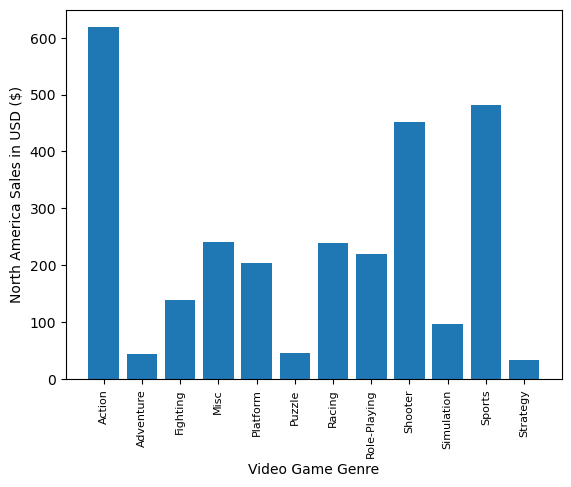

In [81]:
# Plot the highest number of sales by Genre

Sales_by_Video_Games = vg_sales_df.groupby('Genre').sum()['NA_sales'] # Take the number of sales for each city
unique_Video_Games = vg_sales_df.groupby('Genre').sum().index # Take all Video games 

# Plot the highest number of sales for each Genre
plt.bar(unique_Video_Games, Sales_by_Video_Games)
plt.xticks(unique_Video_Games, rotation = 90, size = 8)
plt.ylabel('North America Sales in USD ($)')
plt.xlabel('Video Game Genre')
plt.show()

## 2 Which Platform had the highest number of sales in North America?

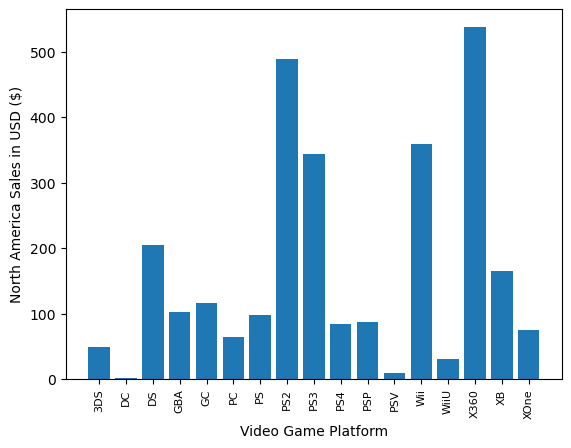

In [83]:
# Plot the highest number of sales by platform

Sales_by_Video_Games = vg_sales_df.groupby('Platform').sum()['NA_sales'] # Take the number of sales for each city
unique_Video_Games = vg_sales_df.groupby('Platform').sum().index # Take all Video games 

# Plot the highest number of sales for each PLatform
plt.bar(unique_Video_Games, Sales_by_Video_Games)
plt.xticks(unique_Video_Games, rotation = 90, size = 8)
plt.ylabel('North America Sales in USD ($)')
plt.xlabel('Video Game Platform')
plt.show()

## 3 Which Genre had the highest number of sales in EU Region?

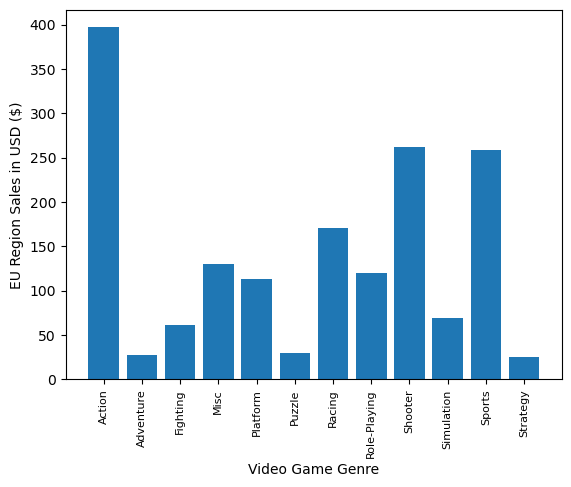

In [84]:
# Plot the highest number of sales by Genre

Sales_by_Video_Games = vg_sales_df.groupby('Genre').sum()['EU_sales'] # Take the number of sales for each city
unique_Video_Games = vg_sales_df.groupby('Genre').sum().index # Take all Video games 

# Plot the highest number of sales for each Genre
plt.bar(unique_Video_Games, Sales_by_Video_Games)
plt.xticks(unique_Video_Games, rotation = 90, size = 8)
plt.ylabel('EU Region Sales in USD ($)')
plt.xlabel('Video Game Genre')
plt.show()

## 4 Which Platform had the highest number of sales in EU Region?

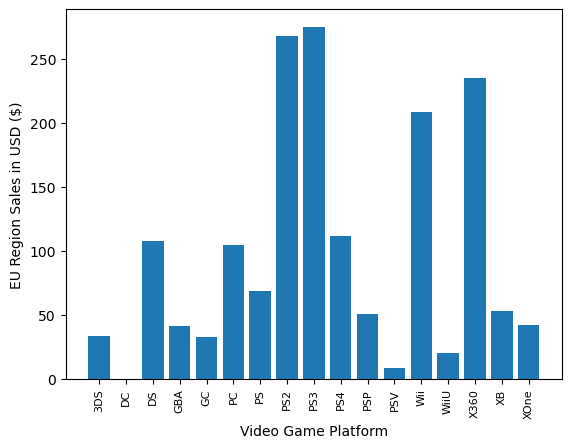

In [85]:
# Plot the highest number of sales by platform

Sales_by_Video_Games = vg_sales_df.groupby('Platform').sum()['EU_sales'] # Take the number of sales for each city
unique_Video_Games = vg_sales_df.groupby('Platform').sum().index # Take all Video games 

# Plot the highest number of sales for each PLatform
plt.bar(unique_Video_Games, Sales_by_Video_Games)
plt.xticks(unique_Video_Games, rotation = 90, size = 8)
plt.ylabel('EU Region Sales in USD ($)')
plt.xlabel('Video Game Platform')
plt.show()

## 5 Which Genre had the highest number of sales in Japan?

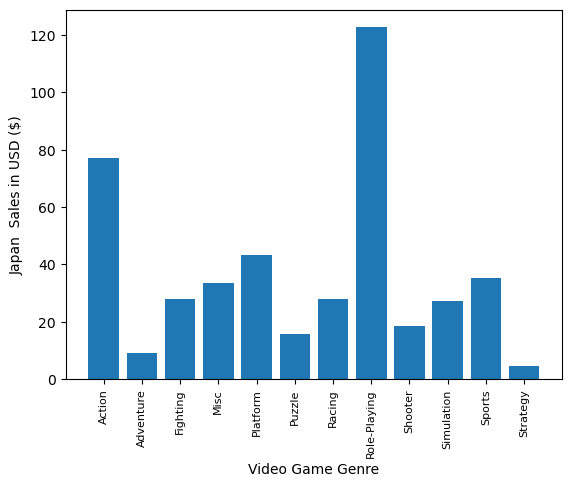

In [87]:
# Plot the highest number of sales by platform

Sales_by_Video_Games = vg_sales_df.groupby('Genre').sum()['JP_sales'] # Take the number of sales for each city
unique_Video_Games = vg_sales_df.groupby('Genre').sum().index # Take all Video games 

# Plot the highest number of sales for each PLatform
plt.bar(unique_Video_Games, Sales_by_Video_Games)
plt.xticks(unique_Video_Games, rotation = 90, size = 8)
plt.ylabel('Japan  Sales in USD ($)')
plt.xlabel('Video Game Genre')
plt.show()

## 6 Which Platform had the highest number of sales in Japan?

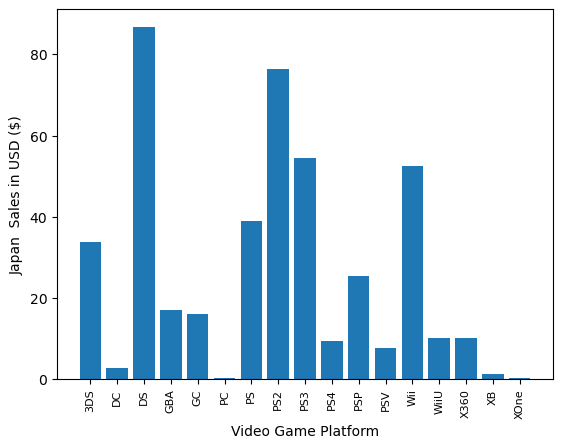

In [88]:
# Plot the highest number of sales by platform

Sales_by_Video_Games = vg_sales_df.groupby('Platform').sum()['JP_sales'] # Take the number of sales for each city
unique_Video_Games = vg_sales_df.groupby('Platform').sum().index # Take all Video games 

# Plot the highest number of sales for each PLatform
plt.bar(unique_Video_Games, Sales_by_Video_Games)
plt.xticks(unique_Video_Games, rotation = 90, size = 8)
plt.ylabel('Japan  Sales in USD ($)')
plt.xlabel('Video Game Platform')
plt.show()